In [4]:
#importing the necessary libraries

import numpy as np #mathematical operations
import pandas as pd #dataframes, file reading
import matplotlib.pyplot as plt # visualization 1
import seaborn as sns # visualization 2
from scipy import stats #statistical functions library

%matplotlib inline

In [5]:
#importing the datasets

train_data = pd.read_csv(r'C:\Users\vvaleti\OneDrive - Capgemini\DS\Kaggle\House prices\train.csv')
test_data = pd.read_csv(r'C:\Users\vvaleti\OneDrive - Capgemini\DS\Kaggle\House prices\test.csv')

In [6]:
#checking what data we have

train_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1011,1012,90,RL,75.0,9825,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,100000
1002,1003,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,232000
1368,1369,120,RM,NaN,4435,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,144000
1044,1045,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal,278000
1009,1010,50,RL,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,102000


In [7]:
test_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1025,2486,20,RL,81.0,14175,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,12,2007,WD,Normal
874,2335,60,RL,88.0,11762,Pave,NaN,Reg,Lvl,AllPub,...,144,0,NaN,NaN,NaN,0,9,2007,WD,Normal
858,2319,60,RL,64.0,7713,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,New,Partial
758,2219,50,C (all),52.0,5150,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
869,2330,60,RL,59.0,9649,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [8]:
#Let's see how many rows and columns we have in the data - Train as well as test

print('train data_(rows,columns):' + str(train_data.shape))
print('test data_(rows,columns):' + str(test_data.shape))

train data_(rows,columns):(1460, 81)
test data_(rows,columns):(1459, 80)


Before go do the data cleaning, feature engineering, model building, let's see if we can infer anything from the data

Exploratory data analysis 

1) SalePrice distribution

In [9]:
#Setting up a basic plot settings
#using rcParams to change the default value of the respective parameters

plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['font.size'] = 12
sns.set_style(style='darkgrid')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

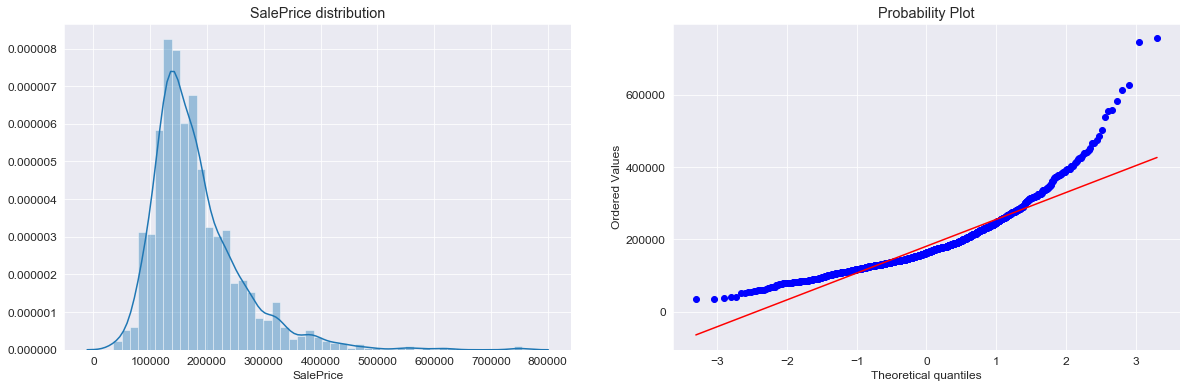

In [10]:
plt.figure(figsize=[20,6])

#Saleprice distribution
plt.subplot(1,2,1)
plt.title('SalePrice distribution')
sns.distplot(train_data['SalePrice'], kde = True)

#Probplot of Saleprice
plt.subplot(1,2,2)
plt.title('SalePrice Probability plot')
stats.probplot(train_data['SalePrice'], fit = True, plot = plt)

If you see the distribution of the sale price, it's not normally distributed. If we are going to build a linear regression model, one of the main assumptions is a multivariate normal distribution, so this might have to transformed. More on this and the linear regression assumptions later

2) Multivariate Analysis

Now what we want to do is, have a look at our independent features. Since there are 80 features over there (both numerical as well object types), it would be difficult as well not really useful to try and infer anything from there. So another thing which we might is, see the correlation between our dependent feature and have a look at the sort of high correlated features

In [11]:
#corretion between saleprice and the independent features

(train_data.corr()**2)['SalePrice'].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

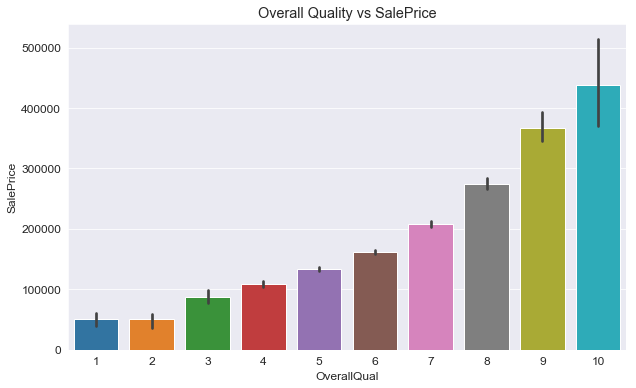

In [12]:
#OverallQual vs SalePrice 

plt.title('Overall Quality vs SalePrice')
sns.barplot(train_data['OverallQual'], train_data['SalePrice'])

As one can expect, the better the quality of the house, the higher the price. No wonder the correlation is high. But I came across another similar feature while working with this feature, which is 'OverallCond'. However when I check the correlation, it's value is not so high. let's compare them, shall we?

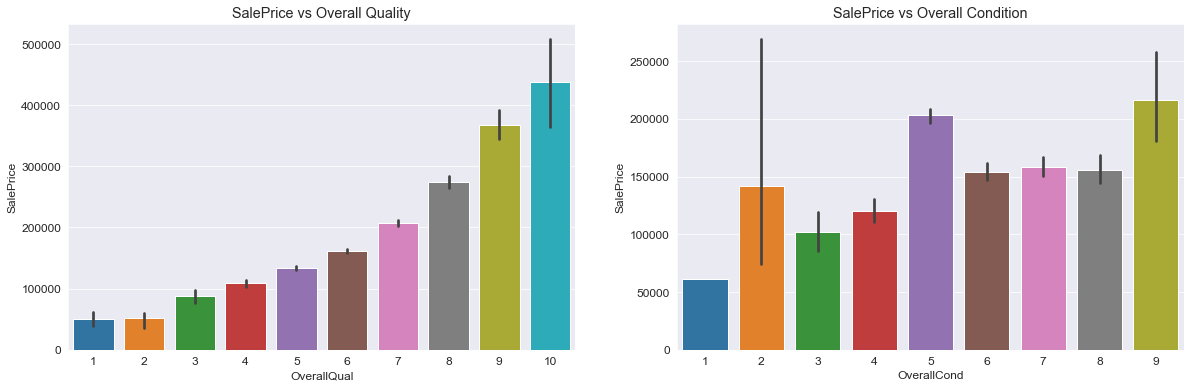

In [13]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
plt.title('SalePrice vs Overall Quality')
sns.barplot(train_data['OverallQual'], train_data['SalePrice'])

plt.subplot(1,2,2)
plt.title('SalePrice vs Overall Condition')
sns.barplot(train_data['OverallCond'], train_data['SalePrice'])

As already discussed, even though Saleprice is highly correlated with overall quality, doesn't seem to be the case for overall condition. This might be because the price is dependent on other factors also. However if we want to explain this, one way of looking at it is, a house with a lesser price and somewhat in a bad condition can always be renovated. Again this doesn't explain everything, just one way of looking at it.

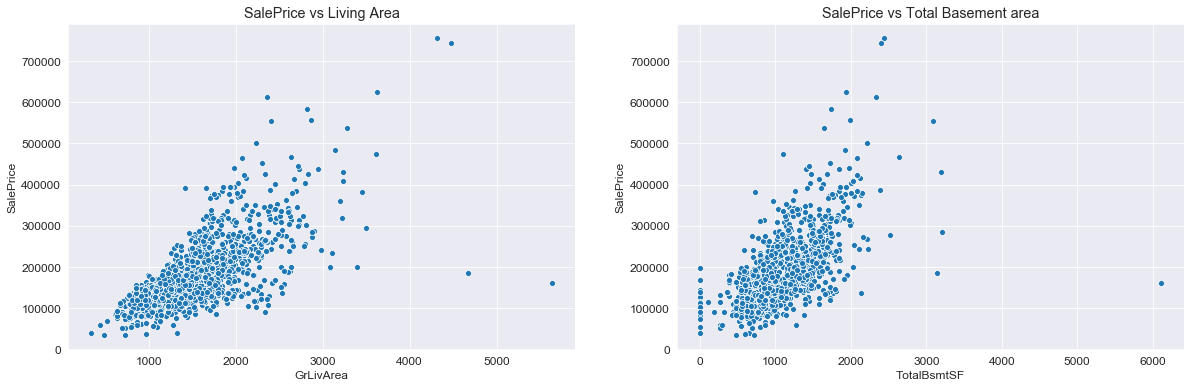

In [14]:
#Moving on, let's go to the next feature - Living Area. One more similar variable is Basement Area. 
#Let's try plotting them both and see if we find something

plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
plt.title('SalePrice vs Living Area')
sns.scatterplot(train_data['GrLivArea'], train_data['SalePrice'])

plt.subplot(1,2,2)
plt.title('SalePrice vs Total Basement area')
sns.scatterplot(train_data['TotalBsmtSF'], train_data['SalePrice'])

As you might have guessed already, there seems to be a better linear relationship between the living area (Both basement and above ground) and Sale price, which makes sense, since the higher the area the costlier it will get.

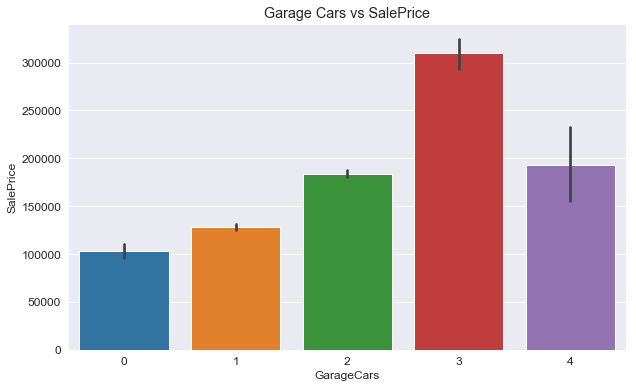

In [15]:
#Garage Cars

plt.title('Garage Cars vs SalePrice')
sns.barplot(train_data['GarageCars'], train_data['SalePrice'])

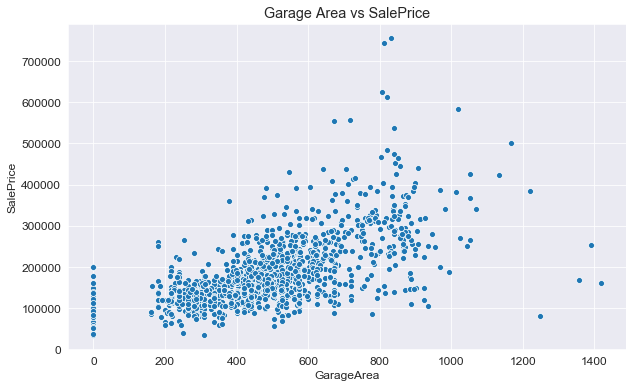

In [16]:
#Garage Area

plt.title('Garage Area vs SalePrice')
sns.scatterplot(train_data['GarageArea'], train_data['SalePrice'])

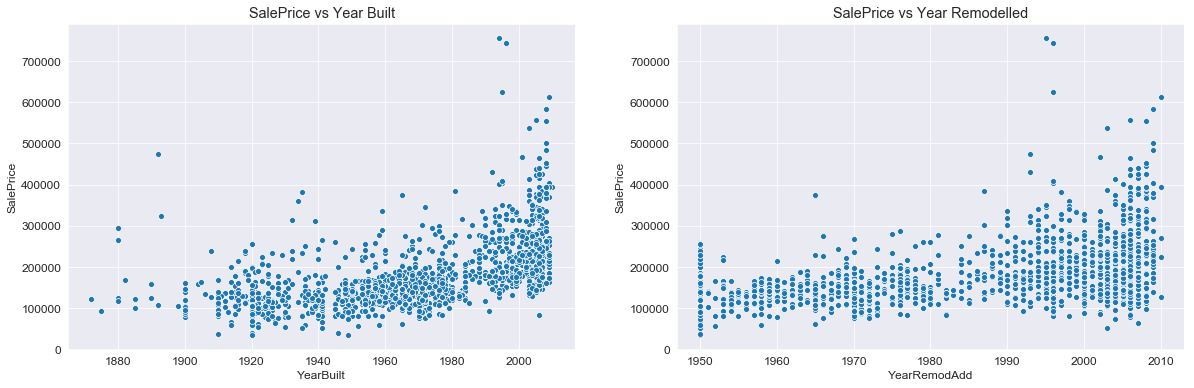

In [17]:
#Year Built and remodelled

plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
plt.title('SalePrice vs Year Built')
sns.scatterplot(train_data['YearBuilt'], train_data['SalePrice'])

plt.subplot(1,2,2)
plt.title('SalePrice vs Year Remodelled')
sns.scatterplot(train_data['YearRemodAdd'], train_data['SalePrice'])

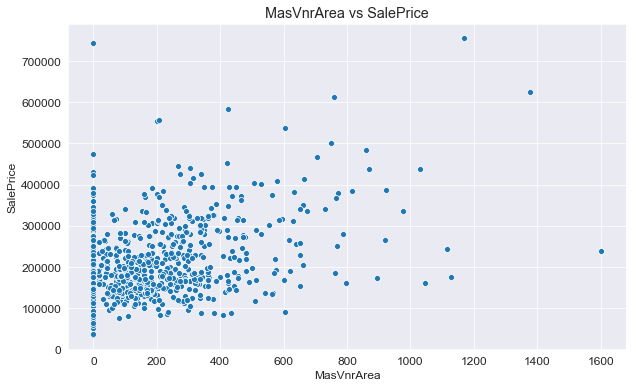

In [49]:
#MasVnrArea

plt.title('MasVnrArea vs SalePrice')
sns.scatterplot(train_data['MasVnrArea'], train_data['SalePrice'])

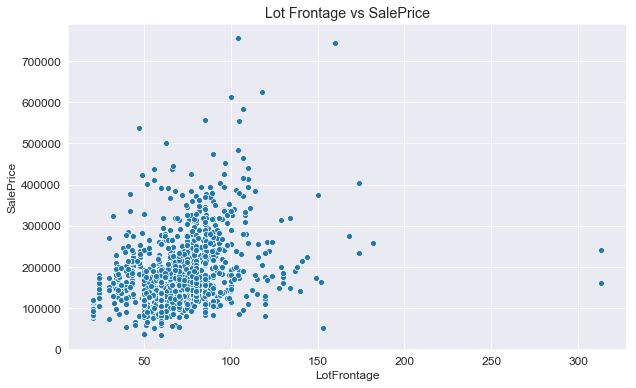

In [18]:
#LotFrontage

plt.title('Lot Frontage vs SalePrice')
sns.scatterplot(train_data['LotFrontage'], train_data['SalePrice'])

I think we have seen enough plots for now. One important inference to note here is, that there are a couple of outliars in the data. Regression models espcially linear regression are highly susceptible to the outliars, so we would have to remove them, which we will do at a later part.

3) Assumtions of linear regression

While we are here, let's see if our data holds up the assumptions of linear regression

1) Linearity - linear relationship between the features and the dependent variable 

2) Homoscedasticity - The errors/residuals should be constant between different features, shouldnt change with the value of Y 

3) No or little multicollinearity - There should be no or little dependency between the independent variables 

4) Multivariate Normality - Dependent variable should be distributed normally across all the features

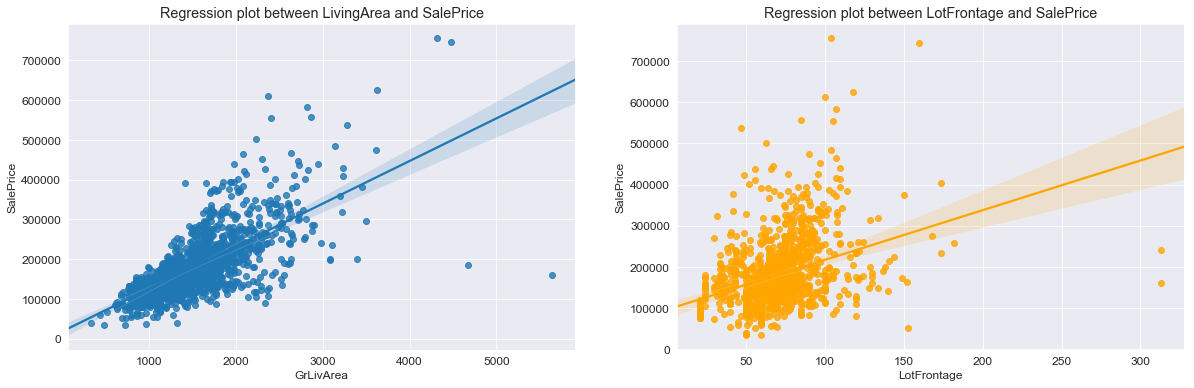

In [19]:
#Linearity

#Let's take any two features for this and have a look at the plots - GrLivArea & LotFrontage

plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
plt.title('Regression plot between LivingArea and SalePrice')
sns.regplot('GrLivArea','SalePrice', train_data)

plt.subplot(1,2,2)
plt.title('Regression plot between LotFrontage and SalePrice')
sns.regplot('LotFrontage', 'SalePrice', train_data, color='orange')

#Additional Point: 
#For visualizing regression, there seems to be functions in seaborn - 'regplot' & 'lmplot', the first one is used here.
#regplot() performs a simple linear regression model fit where as lmplot() combines regplot() and FacetGrid, 
#which is more intense computationally and is not really needed here anyway

Although there is a good linear relationship between Saleprice and GrLivArea, same can't be said for LotFrontage. So the data is not really linear across all the features. We might have to modify our function accordingly.

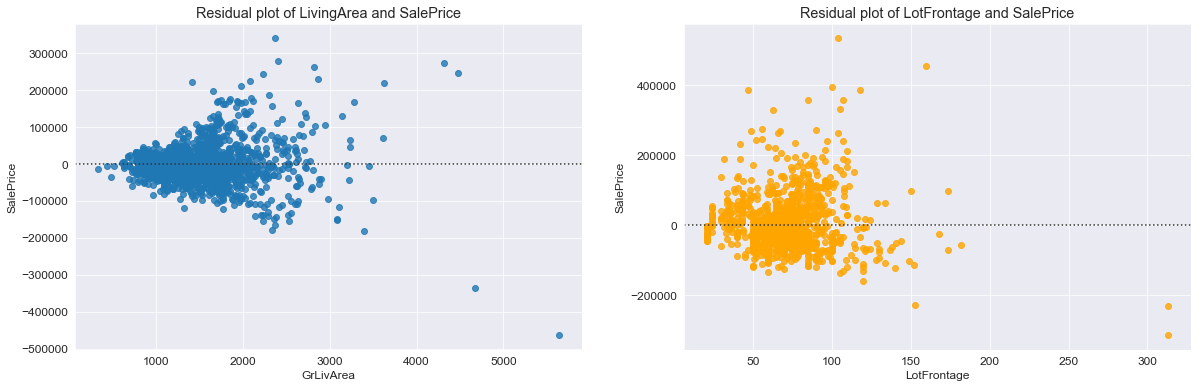

In [20]:
#Homoscedasticity

#Let's looks at the error variance for the above two features itself

plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
plt.title('Residual plot of LivingArea and SalePrice')
sns.residplot('GrLivArea','SalePrice', train_data)

plt.subplot(1,2,2)
plt.title('Residual plot of LotFrontage and SalePrice')
sns.residplot('LotFrontage', 'SalePrice', train_data, color='orange')

For Homoscedasticity, the error should be constant regardless of the value of the dependent variable. So basically the residual plot should not follow any pattern. That seems to be the case for LotFrontage however doesn't seem to be for GrLivArea. So we have to address this.

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

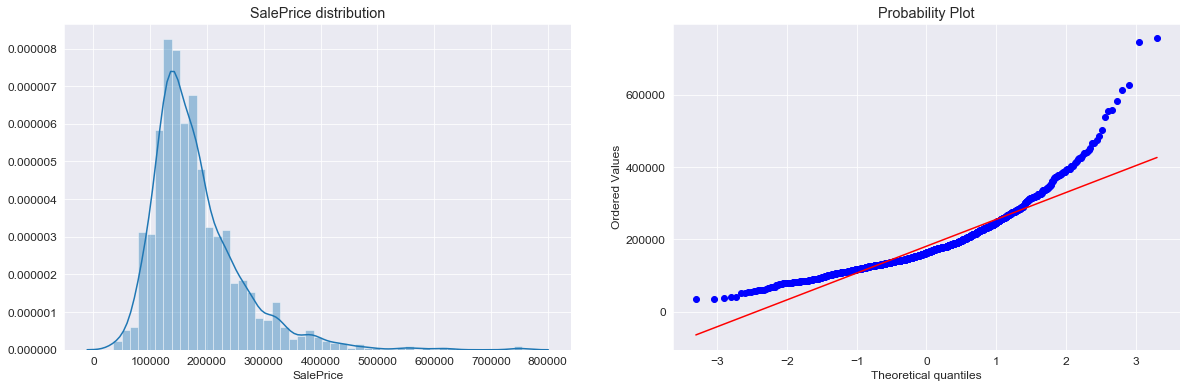

In [21]:
#Multivariate Normality

#As we already saw earlier, the Saleprice is not normal, it's skewed.

plt.figure(figsize=[20,6])

#Saleprice distribution
plt.subplot(1,2,1)
plt.title('SalePrice distribution')
sns.distplot(train_data['SalePrice'], kde = True)

#Probplot of Saleprice
plt.subplot(1,2,2)
plt.title('SalePrice Probability plot')
stats.probplot(train_data['SalePrice'], fit = True, plot = plt)

In [22]:
#Let's see, quantitatively how much is the difference from a normal distribution. We can see that from the below measures
#Skewness: measure of lack of symmetry in a distribution
#Kurtosis: measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

#Getting the skewness and kurtosis

from scipy.stats import skew, kurtosis
print ('Skewness:' + str(train_data['SalePrice'].skew()))
print('Kurtosis:' + str(train_data['SalePrice'].kurt()))

Skewness:1.8828757597682129
Kurtosis:6.536281860064529


In [23]:
#Let's see how we can address this, so that our features are normally disributed
# and are homoscedastic - a transform should ideally fix both of them

#making a copy of the train data

train_data_org = train_data.copy()

#using a log transformation to get a normal distribution
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3982596466541509, 12.024057394918403, 0.9953761551826703))

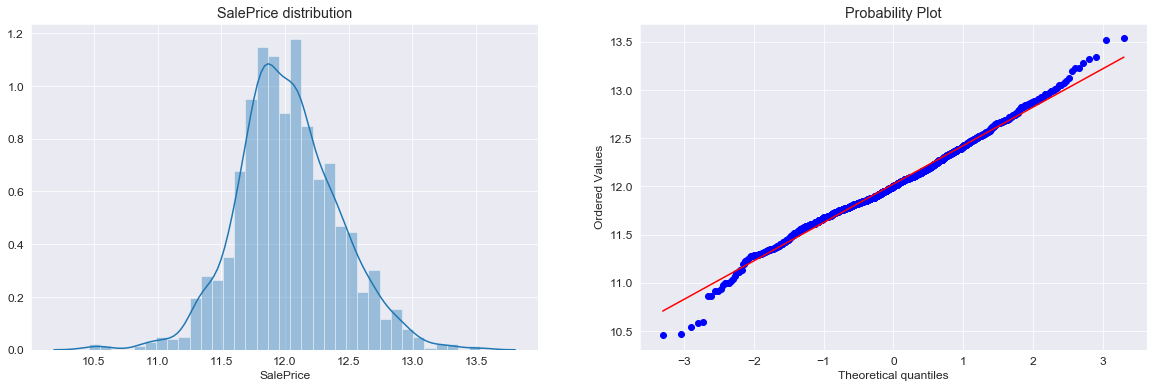

In [58]:
#Let's see the saleprice distribution again

plt.figure(figsize=[20,6])

#Saleprice distribution
plt.subplot(1,2,1)
plt.title('SalePrice distribution')
sns.distplot(train_data['SalePrice'], kde = True)

#Probplot of Saleprice
plt.subplot(1,2,2)
plt.title('SalePrice Probability plot')
stats.probplot(train_data['SalePrice'], fit = True, plot = plt)

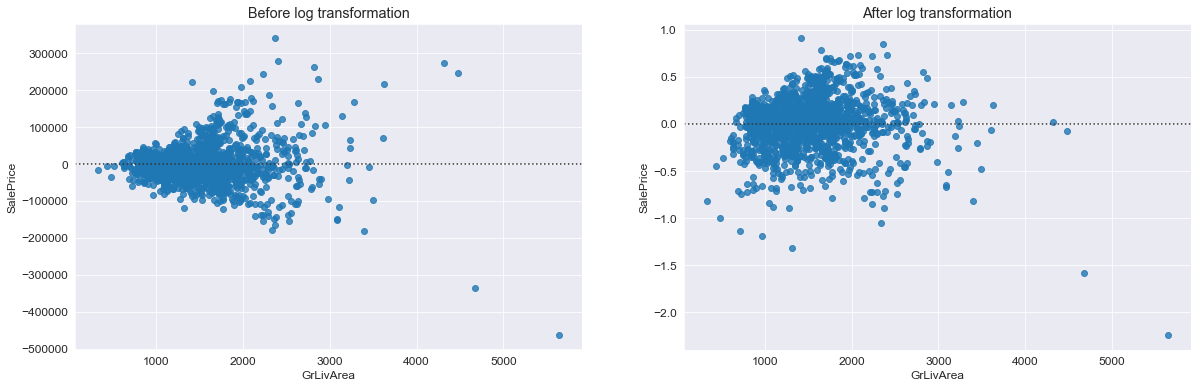

In [24]:
#Let's see the residual plots also, before and after the transformation

plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
plt.title('Before log transformation')
sns.residplot('GrLivArea','SalePrice', train_data_org)

plt.subplot(1,2,2)
plt.title('After log transformation')
sns.residplot('GrLivArea','SalePrice', train_data)

So after the log transform of the sale price, both the multivariate normality and heteroscadascity seems to be better than before. Another transformation that could be used is the boxcox transformation

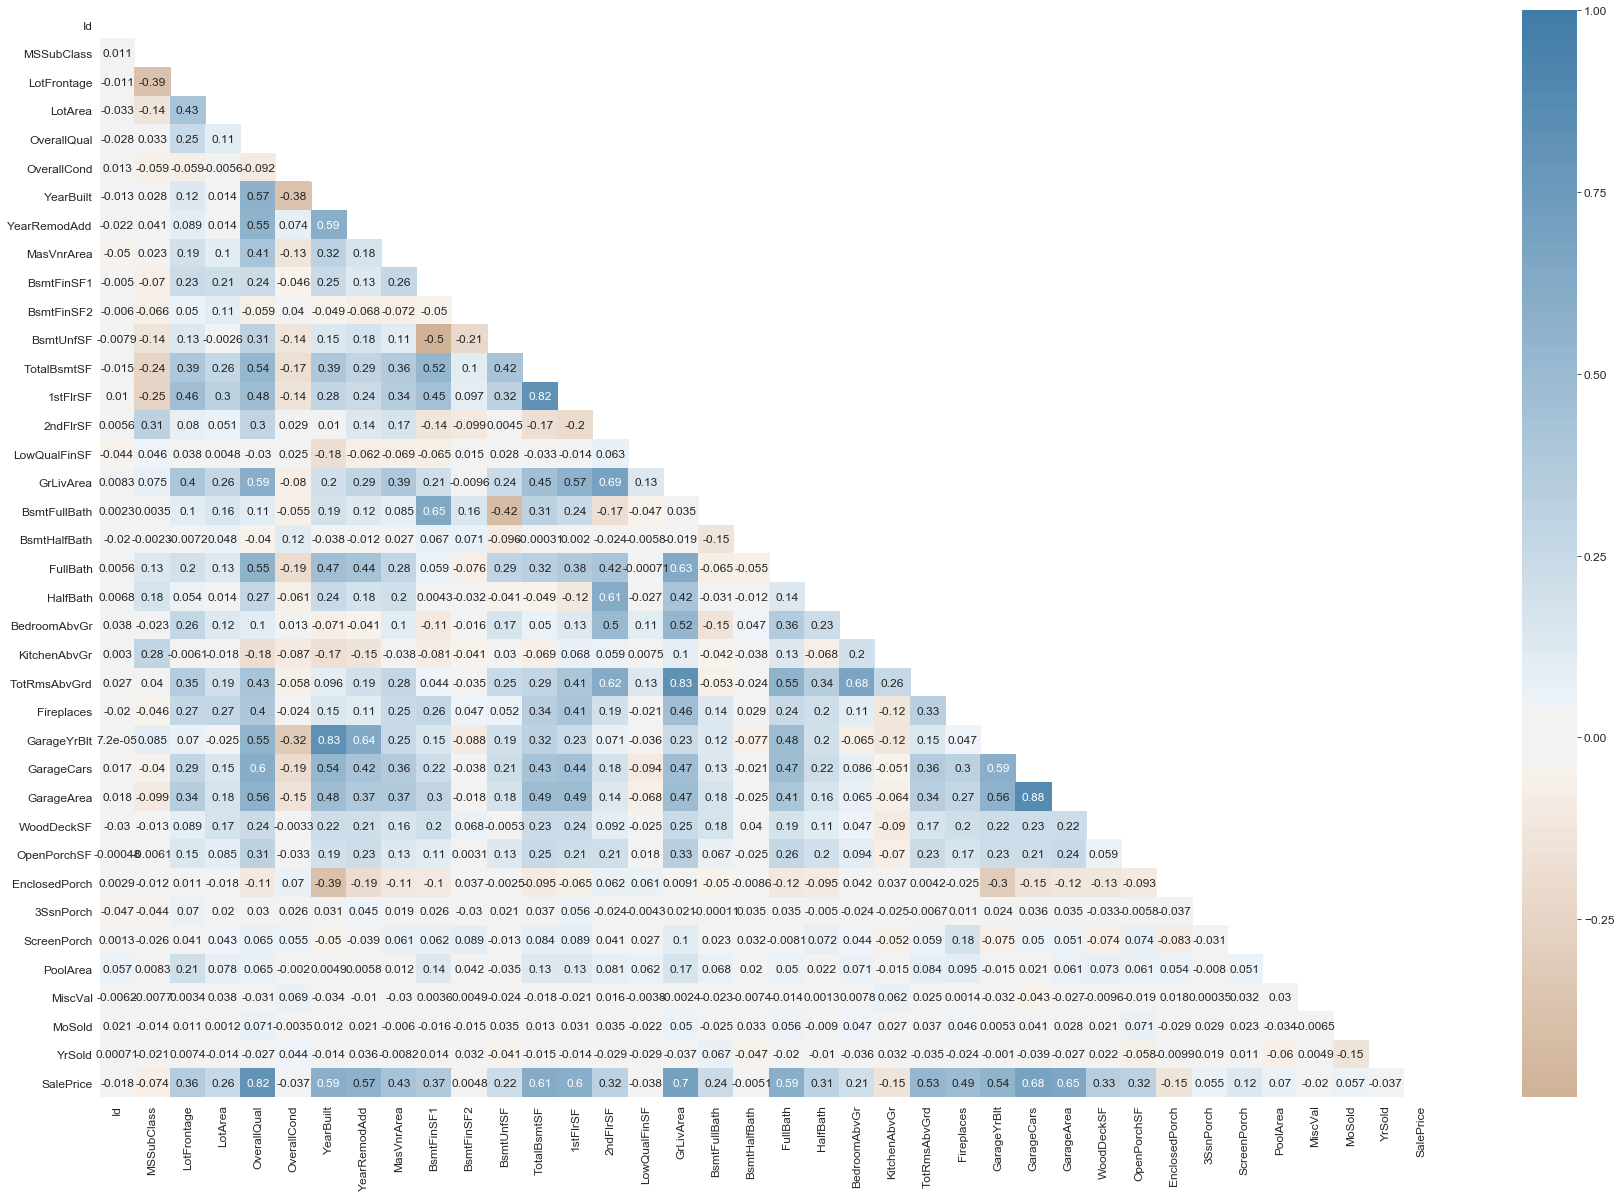

In [25]:
#Multicollinearity
#Heatmaps are always a good way to see the correlations between variables.

#masking the upper traingle as it's just redundant
#taken from seaborn heatmap docuementation
mask = np.zeros_like(train_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=[30,20])

with sns.axes_style('white'):
    sns.heatmap(train_data.corr(), cmap = sns.diverging_palette(40,240, n= 200),mask=mask, center=0, annot=True)

As can be seen from the above heatmap, there is high multicollinearity between couple of features. For eg. there is 88% correlaton between GarageArea and GarageCars, which is really high.

We will be try various regression algorithms other than just linear regression, where we might not have to remove the highly multicollinear features. Also we can use Partial Least Squares Regression (PLS) or Principal Components Analysis, regression methods that cut the number of predictors to a smaller set of uncorrelated components.

4) Data cleaning and feature engineering

Now that we have some inference, it's time to start working towards the model building. Before that, we need to make sure our data is good to go. We have the below tasks in our hands to make sure our data is good:

1) As you might have observed by now, there are some missing values in the data. They need to be removed or filled.

2) Normality of other features, basically reduce the skewness present.

3) Address the multicollinearity present between the 'independent' features.

4) Remove the outliars present in the data.

In [26]:
#Missing values

#First we need to find out how many missing values are there in our data, in each of the features.
#let's write a function to calculate the missing values

#This function takes a dataframe as an input and prints the number and percentage of missing values
def missing_percentage(df):
    df_columns = df.shape[0]
    missing_percentage = df.isnull().sum()*100/df_columns
    missing_values = df.isnull().sum()[df.isnull().sum() != 0]
    
    data = {'no. of missing values':missing_values, 'missing percentage':missing_percentage[missing_percentage != 0]}
    missing = pd.DataFrame(data).sort_values(by = ['missing percentage'], ascending=False)
    print(missing)

In [27]:
#Since we have missing data in both train data and test data, let's combine the data

#Save the dependent feature - Saleprice separately
SalePrice = train_data['SalePrice']
train_data.drop('SalePrice', axis = 1, inplace = True)

In [28]:
total_data = pd.concat([train_data, test_data], axis = 0, sort = False)

In [29]:
missing_percentage(total_data)

              no. of missing values  missing percentage
PoolQC                         2909           99.657417
MiscFeature                    2814           96.402878
Alley                          2721           93.216855
Fence                          2348           80.438506
FireplaceQu                    1420           48.646797
LotFrontage                     486           16.649538
GarageFinish                    159            5.447071
GarageQual                      159            5.447071
GarageCond                      159            5.447071
GarageYrBlt                     159            5.447071
GarageType                      157            5.378554
BsmtExposure                     82            2.809181
BsmtCond                         82            2.809181
BsmtQual                         81            2.774923
BsmtFinType2                     80            2.740665
BsmtFinType1                     79            2.706406
MasVnrType                       24            0

In [30]:
#let's address each feature

#PoolQC: Pool Quality
#Now many houses may not have a pool itself, so for those obviously PoolQC wont be available
#Lets see if thats the case with the other Pool feature we have - PoolArea

#first let's write a function that takes a feature and see how many of its rows are zeroes
def count_zeroes(col):
    count = 0
    for i in col:
        if i == 0:
            count += 1
    print(count)

In [31]:
#Counting the number of houses for which the pool area is zero i.e no pool

count_zeroes(total_data['PoolArea'])

2906


Remember number of missing values of PoolQC is 2909 and for 2906 houses there is no pool itself, so it's safe to fill the missing the values of PoolQC with something like 'No Pool' instead of removing the column altogether

In [32]:
#for reference, PoolQC has 3 types as seen below

pd.value_counts(total_data['PoolQC'])

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [33]:
total_data['PoolQC'].fillna('No Pool', inplace = True)

In [34]:
#Next: MiscFeature - Miscellaneous feature not covered in other categories
#luckily we have another similar feature from where we can extract some more information - MiscVal

count_zeroes(total_data['MiscVal'])

#Missing values in MiscFeature = 2814

total_data['MiscFeature'].fillna('No Misc Features', inplace = True)

2816


In [35]:
#if you think about it, same would most probably be the case for Alleys, Fence,Fireplace

total_data['Alley'].fillna('No Alley', inplace = True)
total_data['Fence'].fillna('No Fence', inplace = True)
total_data['FireplaceQu'].fillna('No Fireplace', inplace = True)

In [36]:
#Garage features

count_zeroes(total_data['GarageArea'])

#Missing values for Garage features - 159/157

Garage = ['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType']

for i in Garage:
    total_data[i].fillna('No Garage', inplace = True)
    
total_data['GarageYrBlt'].fillna(0, inplace = True)

157


In [37]:
#Basement features

count_zeroes(total_data['TotalBsmtSF'])

#Missinf values for Basement features - 82

Bsmt = ['BsmtCond', 'BsmtExposure', 'BsmtQual','BsmtFinType2', 'BsmtFinType1']

for i in Bsmt:
    total_data[i].fillna('No Basement', inplace = True)

78


In [38]:
total_data['MasVnrType'].fillna(total_data['MasVnrType'].mode()[0], inplace = True)
total_data['MasVnrArea'].fillna(total_data['MasVnrArea'].mean(), inplace = True)
total_data['MSZoning'].fillna(total_data['MSZoning'].mode()[0], inplace = True)

In [39]:
#for LotFrontage, lets replace each value by the median of the Neighborhood

total_data['LotFrontage'] = total_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [40]:
Rest_1 = ['Utilities', 'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'Electrical'
       , 'KitchenQual', 'GarageCars', 'SaleType']
Rest_2 = ['BsmtUnfSF','TotalBsmtSF', 'GarageArea']

for i in Rest_1:
    total_data[i].fillna(total_data[i].mode()[0], inplace = True)
    
for i in Rest_2:
    total_data[i].fillna(total_data[i].mean(), inplace = True)

In [41]:
#That should cover all the missing values in our data. Let's see if we missed anything

missing_percentage(total_data)

Empty DataFrame
Columns: [no. of missing values, missing percentage]
Index: []


In [74]:
#Normality

#Let's find the skewness of our numeric features

num_feats = total_data.dtypes[total_data.dtypes!=object].index
for feats in num_feats:
    skew_value = total_data[num_feats].skew()
    df_skew = pd.DataFrame({'Feature':skew_value.index, 'Skewness':skew_value.values})
df_skew.sort_values(by = 'Skewness', ascending = False)

,Feature,Skewness
34,MiscVal,21.958480
33,PoolArea,16.907017
3,LotArea,12.829025
15,LowQualFinSF,12.094977
31,3SsnPorch,11.381914
22,KitchenAbvGr,4.304467
10,BsmtFinSF2,4.148275
30,EnclosedPorch,4.005950
32,ScreenPorch,3.948723
18,BsmtHalfBath,3.933616


In [93]:
#Transforming high skew features
#Boxcox transformation

from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax #to calculate the optimal lambda for boxcox

#let's get the features with skewness greater than 0.5
highskew_feats = df_skew[abs(df_skew['Skewness']) > 0.5]['Feature']

for feat in highskew_feats:
    total_data[feat] = boxcox1p(total_data[feat], boxcox_normmax(total_data[feat] + 1)) 
# we add the 1 to keep the lambda positive

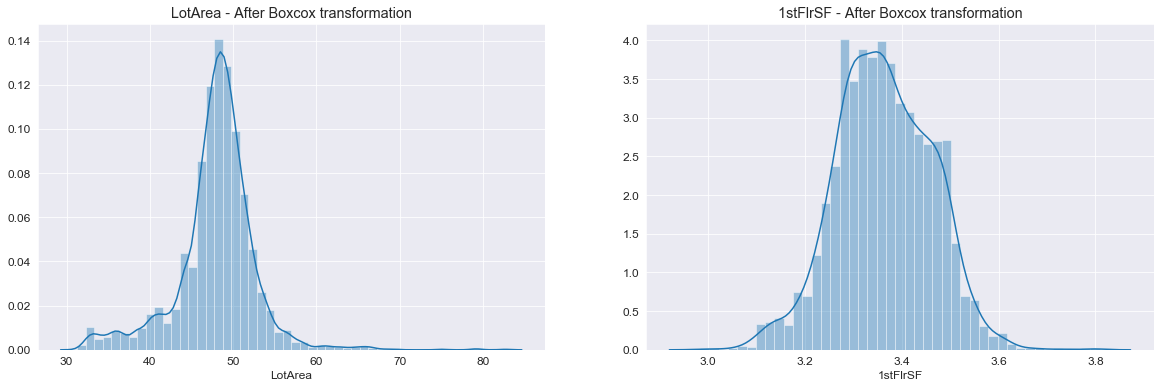

In [96]:
#Let's see if we had any luck with the skewness
#Consdering majority of PoolArea is zero, let's skip that, same reasons for Miscval as well

plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
plt.title('LotArea - After Boxcox transformation')
sns.distplot(total_data['LotArea'])

plt.subplot(1,2,2)
plt.title('1stFlrSF - After Boxcox transformation')
sns.distplot(total_data['1stFlrSF'])

In [153]:
#Let's see if we can remove some unnecessary features
#There seems to be some features which seems to have the same value for all the houses (talking about 99% same values)

object_feats = total_data.dtypes[total_data.dtypes == object].index

redundant_feat = []

for feat in object_feats:
    for i in pd.value_counts(total_data[feat]):
        if i > 2850:
            redundant_feat.append(feat)
            
print(redundant_feat)

[]


In [152]:
total_data = total_data.drop(redundant_feat, axis = 1)

In [160]:
#creating dummy variables for the remaining obj types

total_data_final = pd.get_dummies(total_data).reset_index(drop = True)

In [161]:
total_data_final.shape

(2919, 274)

5) Outliers